# Homework set 6

Before you turn this problem in, make sure everything runs as expected (in the menubar, select Kernel → Restart Kernel and Run All Cells...).

Please **submit this Jupyter notebook through Canvas** no later than **Mon Dec. 12, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Christos Perchanidis    (14601206)

River Vaudrin           (11877154)

----------------

# Exercise 1 (4.5 points)

A bacterial population $P$ grows according to the geometric progression

$$P_t = rP_{t-1}$$

Where r is the growth rate. The following population counts $P_1 ,\ldots, P_8$ (in billions) are observed:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

data = [0.19, 0.36, 0.69, 1.3, 2.5, 4.7, 8.5, 14]

# (a)
Read chapter 6.6 on Nonlinear Least squares. Use the Gauss-Newton Method to fit the model function $f(t, x_1, x_2) = x_1\!\cdot x_2^t$ to the data. Find estimates for the initial population $P_0=x_1$ and the growth rate $r=x_2$.

Plot the observed and modeled data and make a separate plot of the residuals.

After 20 iterations our implementation produced P=[0.16163835] and r=[1.74940289] as the solution.

The norm(residuals)^2 for each iteration: 
[298.9218, 168.9946, 15152.844899358808, 379.1164634712645, 298.92383540283026, 124171677.76554374, 10716.214857160856, 1011.8307324164793, 6.095134280620022, 120.16432285630263, 189.72021527769186, 4.821060997788959, 0.3520554999047456, 0.3177432565059858, 0.3177431280391856, 0.31774312792854653, 0.3177431279282091, 0.3177431279282081, 0.3177431279282076, 0.31774312792820836]


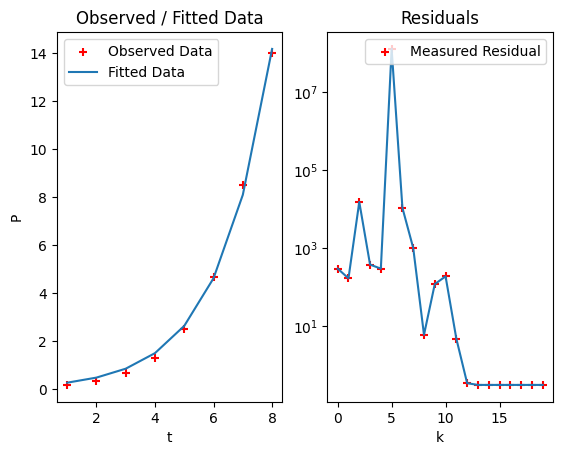

In [2]:
# Function to plot modeled/fitted data and residuals
def plotFit(K, t, y, x, residuals_list):
    plt.subplot(1, 2, 1)
    plt.scatter(t, y, c="r", marker="+", label="Observed Data")
    plt.plot(t, F(t, x[0], x[1]), label="Fitted Data")
    plt.title("Observed / Fitted Data")
    plt.xlabel("t")
    plt.ylabel("P")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(np.linspace(0, K-1, K), residuals_list, c="r", marker="+", label="Measured Residual")
    plt.plot(np.linspace(0, K-1, K), residuals_list)
    plt.yscale("log")
    plt.title("Residuals")
    plt.xlabel("k")
    plt.legend()

    plt.show()

# Function: f(t,x1,x2) = x1 * x2**t
def F(t, x1, x2):
    return x1 * x2 ** t

# Jacobian of residual function
def Jacobian(t, x1, x2):
    return np.array([-x2**t, -t*x1*x2**(t-1)]).T

# Gauss-Newton Method to fit the function above^
def NLLS_GaussNewton(K, x0, t, y, p=False):
    # store initial guess as current solution
    x = x0
    # init list that stores norm residuals
    residuals_list = []
    # loop unitl max iterations reached
    for k in range(K):
        # compute predictions of y with current solution
        y_pred = F(t, x[0], x[1])

        # compute the residuals and store norm(r)^2 to list
        residuals = np.array([y - y_pred]).T
        residuals_list.append(np.linalg.norm(residuals)**2)
    
        # compute the Jacobian of residual function
        jacobian = Jacobian(t, x[0], x[1])

        # solve Newton step
        s = np.linalg.lstsq(jacobian, -residuals, rcond=None)[0] 
        
        # update the current solution
        x = x + s

        # print info per iteration if flag set to True
        if p:
            print("ITERATION: {}".format(k))
            print("* Jacobian: \n{}".format(jacobian))
            print("* Residuals: \n{}".format(residuals))
            print("* Current x: \n{}".format(x))
            print("-----------------")

    # return solution and list of residuals
    return x, residuals_list


y = [0.19, 0.36, 0.69, 1.3, 2.5, 4.7, 8.5, 14] # Data
t = np.linspace(1,len(y),len(y)) # Time steps
K = 20 # Max iterations
x0 = np.array([[0],[1]]) # Initial Guess

x, residuals_list = NLLS_GaussNewton(K, x0, t, y, p=False)

print("After {} iterations our implementation produced P={} and r={} as the solution.\n".format(K, x[0], x[1]))
print("The norm(residuals)^2 for each iteration: \n{}".format(residuals_list))
plotFit(K, t, y, x, residuals_list)

# (b) 
Let $f$ be a vector valued function $f = [ f_1, \ldots, f_m ]^T$. In weighted least squares one aims to minimize the objective function
$$
  \phi(x) = \frac{1}{2} \sum_{i=1}^m W_{ii} ( f_i(x) - y_i) ^2 , \qquad
  W_{ii} = \frac{1}{\sigma_i^2} , 
$$
where $\sigma_i$ is an estimate of the standard deviation in the data point $y_i$. This is equivalent to the standard least squares problem 
$$
\min_x \frac{1}{2} \| F(x) - Y \|^2
$$
with $F(x) = T f(x)$  , $Y = T y$, where $T$ is the diagonal matrix with $\frac{1}{\sigma_i}$ on the diagonal. Assume that for each data point $y_i$ in the list above, the estimate for the standard deviation is given by
$$
  \sigma_i = 0.05 y_i .
$$ 
Perform a weighted least squares fit to obtain estimates for $P_0 = x_1$ and $r = x_2$.
Plot the observed and modeled data and make a separate plot of the residuals.

Are the results different from those of part (a)? Discuss and explain the differences.


After 20 iterations our implementation produced P=[0.12495267] and r=[1.81223897] as the solution.

The norm(residuals)^2 for each iteration: 
[149.4609, 128.23585734551327, 247192.87726145596, 871.0837524292896, 60.81038472865444, 0.6099517111894074, 0.2794405993636794, 0.3031502493276183, 0.30216245589406177, 0.3022187548823811, 0.3022154511872924, 0.30221564773688886, 0.30221563605342094, 0.3022156367479565, 0.30221563670666884, 0.30221563670912344, 0.30221563670897833, 0.30221563670898394, 0.3022156367089848, 0.3022156367089848]


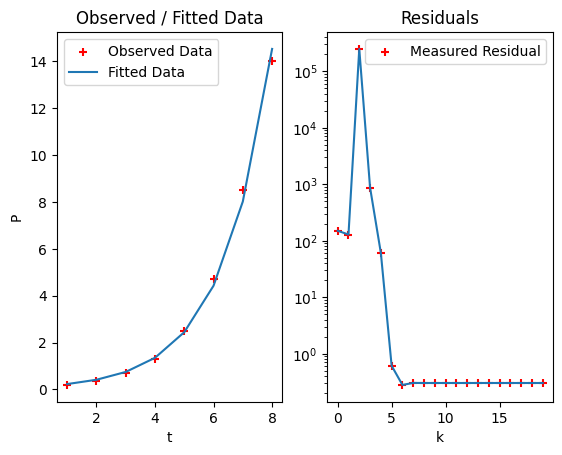

In [3]:
# Returns wieghts matrix
def getT(y, est=0.05):
    T = np.identity(len(y))
    sigma = [(est * y_i) for y_i in y] # is ^2 correct???
    T = T / sigma
    return T

def weightedNLLS(K, x0, t, y, p=False):
    # store initial guess as current solution
    x = x0
    # get weights matrix
    T = getT(y)
    # init list that stores norm residuals
    residuals_list = []
    # loop unitl max iterations reached
    for k in range(K):
        # compute predictions of y with current solution
        y_pred = F(t, x[0], x[1])

        # compute the residuals and store 1/2*norm(r)^2 to list
        residuals = np.array([y - y_pred]).T
        residuals_list.append(1/2 * np.linalg.norm(residuals)**2)
    
        # compute the Jacobian of residual function
        jacobian = Jacobian(t, x[0], x[1])
        
        # solve weigthed Newton step
        s = np.linalg.lstsq(jacobian.T @ T @ jacobian, -(jacobian.T @ T @ residuals), rcond=None)[0] 

        # update the current solution
        x = x + s

        # print info per iteration if flag set to True
        if p:
            print("ITERATION: {}".format(k))
            print("* T: \n{}".format(T))
            print("* Jacobian: \n{}".format(jacobian))
            print("* Residuals: \n{}".format(residuals))
            print("* Current x: \n{}".format(x))
            print("-----------------")

    # return solution and list of residuals
    return x, residuals_list

y = [0.19, 0.36, 0.69, 1.3, 2.5, 4.7, 8.5, 14] # Data
t = np.linspace(1,len(y),len(y)) # Time steps
K = 20 # Max iterations
x0 = np.array([[0],[1]]) # Initial Guess

x, residuals_list = weightedNLLS(K, x0, t, y, p=False)

print("After {} iterations our implementation produced P={} and r={} as the solution.\n".format(K, x[0], x[1]))
print("The norm(residuals)^2 for each iteration: \n{}".format(residuals_list))
plotFit(K, t, y, x, residuals_list)

**Answer:**

The results of the *Gauss-Newton* and the *Weighted Least Squares* methods, for solving the same function, data, and initial guess, show some differences in their respective output. 

We can see, when looking at the plots above, the main difference between the two methods is that the weighted method converges faster than the Gauss-Newton method, $8$ iterations against $14$.

Two other differences are the final values of the found solution ($x=P,r$) and the norm of the residuals. We can see that the norm of the residuals is slightly lower for the weighted method, suggesting that the found solution is more accurate. This improvement also explains the difference in the found solutions of both methods, as the solution found by the weighted method has a better fit according to the norm of residuals, which is the function we are trying to minimize. If we look at the two Observed/Fitted Data plots, it looks like the fit found by the weighted method is better, especially for the first four data points.

Overall these results suggest that the *Weighted Least Squares* method provides a substantial improvement in terms of accuracy and efficiency when compared to the *Gauss-Newton* method.

----------------------
# Exercise 2 (4.5 points)



# (a) 
Let $f(x) = 1/x^2$ and $a=10^{-3}$ and $b=1$. Make a plot of the graph of $f$ on $[a,b]$. 

Text(0, 0.5, '$y$')

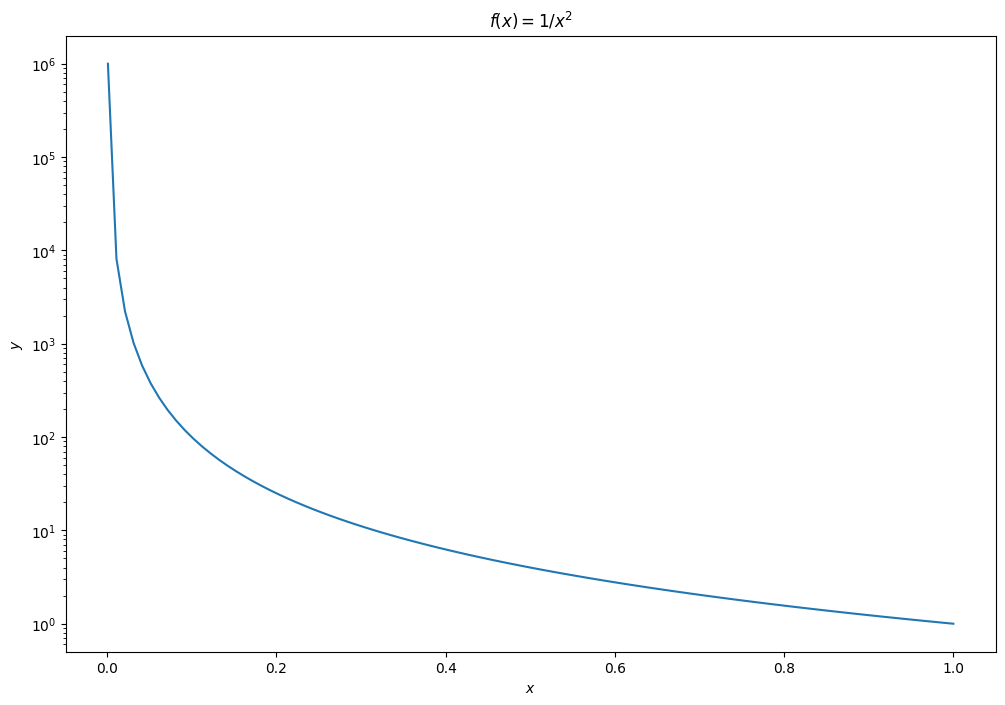

In [4]:
def f(x):
    return 1 / (x**2)

a = 10**-3
b = 1
res = 100   # Amount of points to calculate

x = np.linspace(a, b, res)
y = [f(x_i) for x_i in x]

plt.figure(figsize=(12, 8))
plt.semilogy(x, y)
plt.title("$f(x)=1/x^2$")
plt.xlabel("$x$")
plt.ylabel("$y$")

# (b) 
Use scipy.integrate.quad to compute $\int_a^b f(x) \, dx$ with an absolute error less than 1e-4. Compare with the true value of the integral.

In [5]:
result = integrate.quad(f, a, b, epsabs=10**-4)
print(result)

(999.0000000000119, 7.671666054595572e-05)


**Analytical Solution:**

$$
\int\limits_{10^{-3}}^{1} \frac{1}{x^2}dx =
\int\limits_{10^{-3}}^{1} {x^{-2}}dx =
\frac{x^{-1}}{-1} \Big|_{10^{-3}}^{1} =
-\frac{1}{x} \Big|_{10^{-3}}^{1} =
-1 - \frac{1}{10^{-3}} = -1 - (-1000) = 999 + C
$$

# (c)
scipy.integrate.quad is an adaptive integration routine (book section 8.3.6), that automatically chooses an appropriate subdivision of the interval in subintervals. Therefore in some parts of the interval $[0,1]$ the function $f$ will be evaluated more often than in other parts. Divide the interval $[0,1]$ into bins $B_i = [h * (i-1), h*i]$, with $h=0.01$. For each bin $B_i$, count the number of times $f(x)$ is evaluated with $x$ in $B_i$. Make a histogram plot of these data. In which region is there a large number of function evaluations? Can you explain this, taking into account how $f$ is defined?

Hint: To know for which $x$ the function $f$ is evaluated, you can keep a global array `xVals` in which you store all values of $x$ for which the function $f$ is called. You can use a numpy array and use numpy.append to add new values to `xVals`.


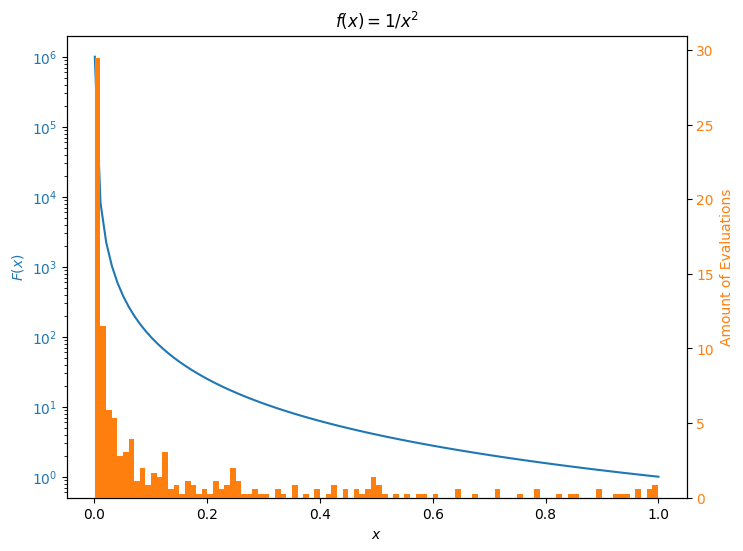

In [6]:
def viz_2_axis(x_axis, y_axis_1, y_axis_2, title):
    # Creating base figure
    fig, ax1 = plt.subplots(figsize=(8,6))
    ax1.set_xlabel('$x$')

    # Creating first Y Axis
    ax1.set_ylabel('$F(x)$', color="C0")
    ax1.semilogy(x_axis, y_axis_1, color="C0")
    ax1.tick_params(axis='y', labelcolor="C0")
    
    # Creating second Y Axis
    ax2 = ax1.twinx()
    ax2.set_ylabel('Amount of Evaluations', color="C1")
    ax2.hist(y_axis_2, density=True, bins=i, color="C1")
    ax2.tick_params(axis='y', labelcolor="C1")

    plt.title(title)
    plt.show()

def f(x):
    evals.append(x)
    return 1 / (x**2)

i = 100     # Amount of bins to evaluate
h = 0.01    # Bin's size
evals = []  # xVals

for i in range(1, i+1):
    integrate.quad(f, a, b, epsabs=10**-4)

viz_2_axis(x, y, evals, "$f(x)=1/x^2$")

**Answer:**

The rate of change for our function $f(x)=\frac{1}{x^2}$ is not equal on the interval $[0, 1]$. It changes rapidly in the beginning, and then rate of change slows. This property can be utilized, and this is exactly what Adaptive Quadrature algorithm does.

It subdivides interval of integration so that it is selectively refined, regions where the function is well behaved are evaluated less, and regions where the function is difficult to integrate have more sampling points. As can be seen from the graph, there are much more evaluations in the beginning, where function changes rapidly, and more evaluations are needed to achieve high accuracy in integration. It can be said that the amount of function evaluations follows the curvature of the function.

Also, we can see how a bigger amount of calculations are around the middle and the end of the
interval. This happens because algorithm breaks interval in subintervals iteratively, by breaking it in the middle, until the integration accuracy requirement is met. Thus, points on the opposites of subintervals are evaluated more, and some points are more often on the extremes of subintervals.